In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('housing.csv')

In [3]:
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Clean Up Data

In [4]:
dataset.dropna(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

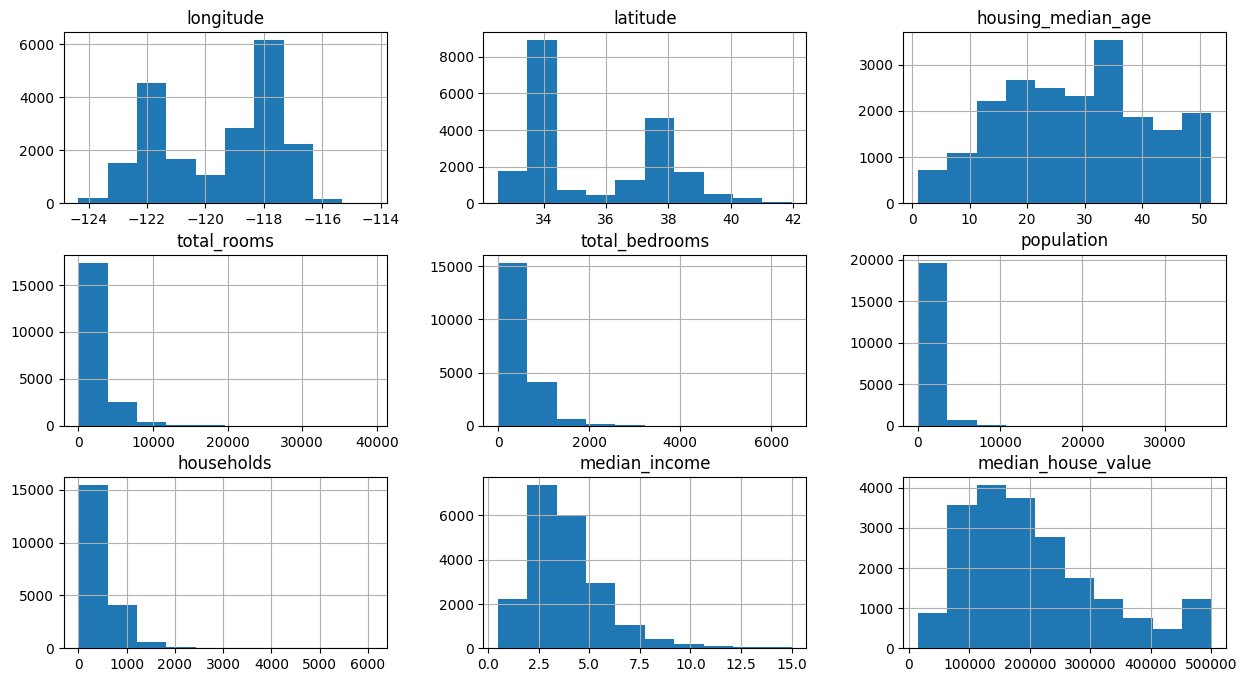

In [5]:
dataset.hist(figsize=(15,8))

## Make it look like a Gaussion Bell Curve

In [6]:
dataset['total_rooms'] = np.log(dataset['total_rooms'] + 1 )
dataset['total_bedrooms'] = np.log(dataset['total_bedrooms'] + 1 )
dataset['population'] = np.log(dataset['population'] + 1 )
dataset['households'] = np.log(dataset['households'] + 1 )

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

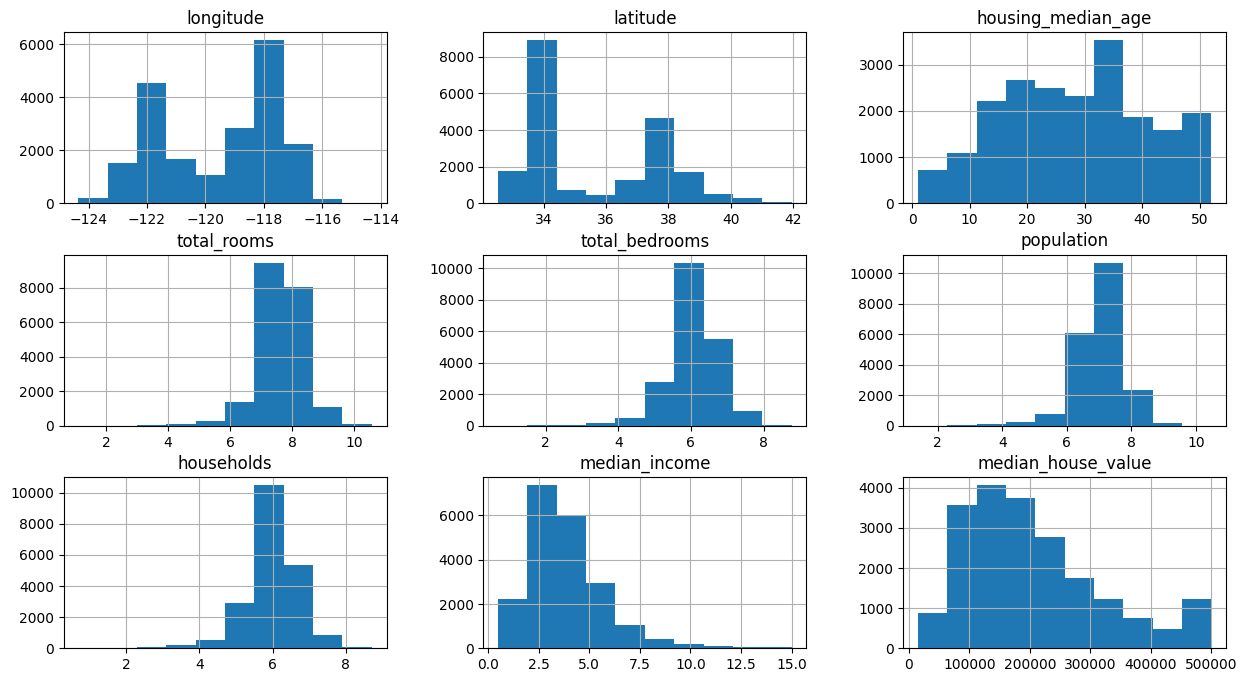

In [7]:
dataset.hist(figsize=(15,8))

## Turn Ocean Proximity into Numerical Attribute

In [8]:
dataset.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [9]:
dataset = dataset.join(pd.get_dummies(dataset.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [10]:
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,False,True,False,False,False


<Axes: >

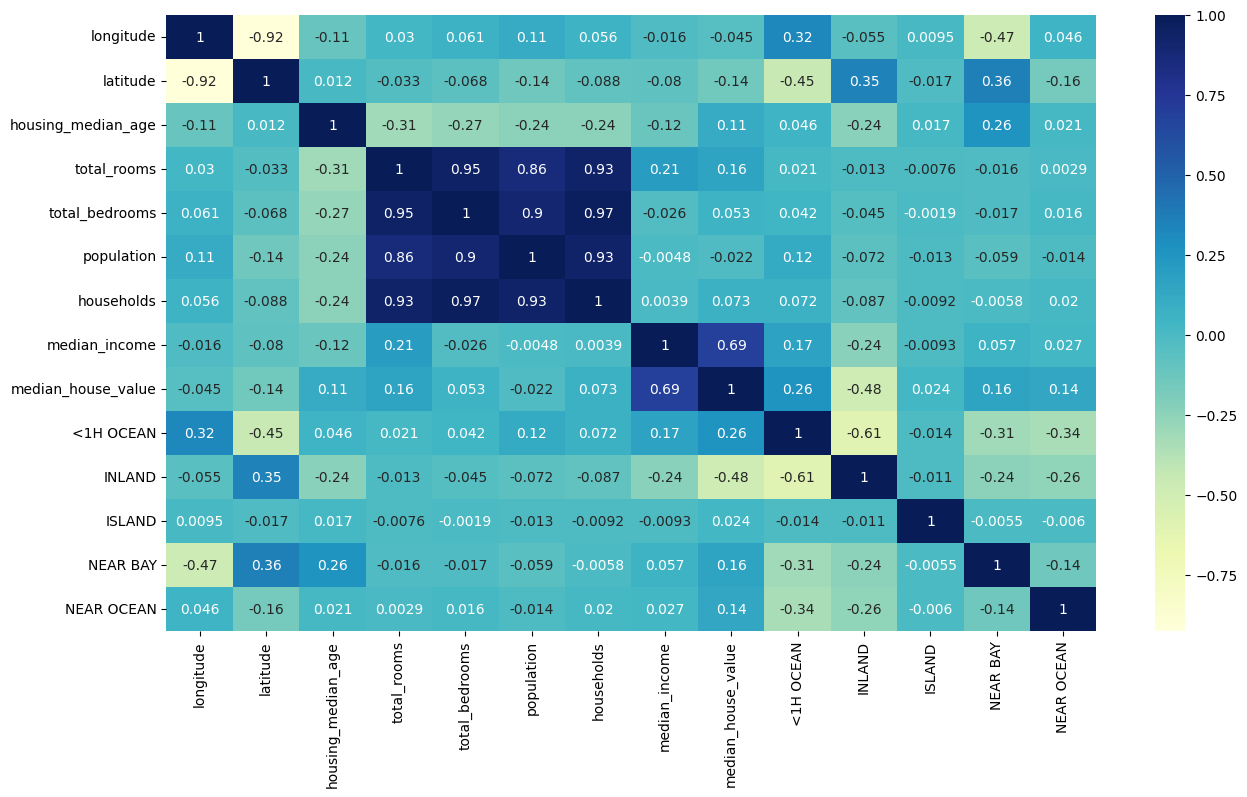

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu')

## What does the Heatmap show us?
### the correlation for INLAND to Median House Value is negative -> so it means that we are paying way less than being NEAR OCEAN. And the most expensive House Values are correlated to the <1h Oceans Attribute

<Axes: xlabel='latitude', ylabel='longitude'>

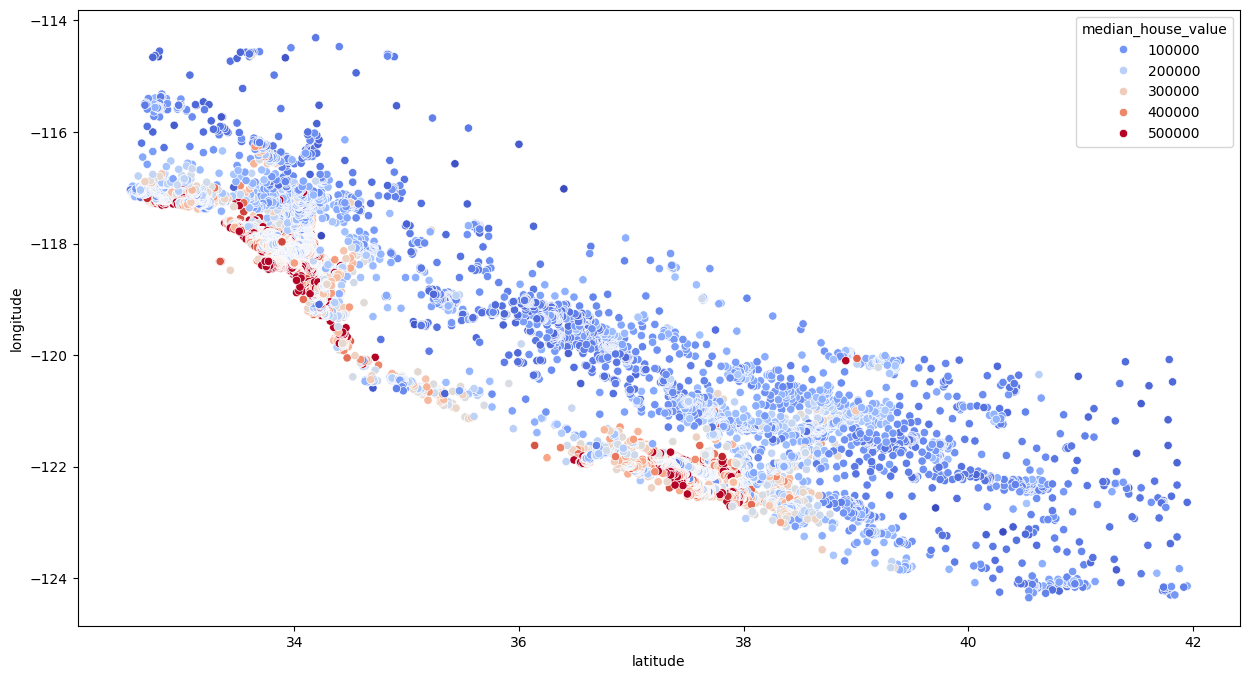

In [12]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=dataset, hue="median_house_value", palette="coolwarm")

## What does this plot shows us?
### Through out the Plot we can see the shap of California. We can see that the House Value is significantly higher near the Ocean. We reach the most expensive Households close to San Francisco and Los Angeles

# Feature Engineering
### Create a correlation between Household, Bedrooms and House Value

In [13]:
dataset['bedroom_ratio'] = dataset['total_bedrooms'] / dataset['total_rooms']
dataset['households_rooms'] = dataset['total_rooms'] / dataset['households']

<Axes: >

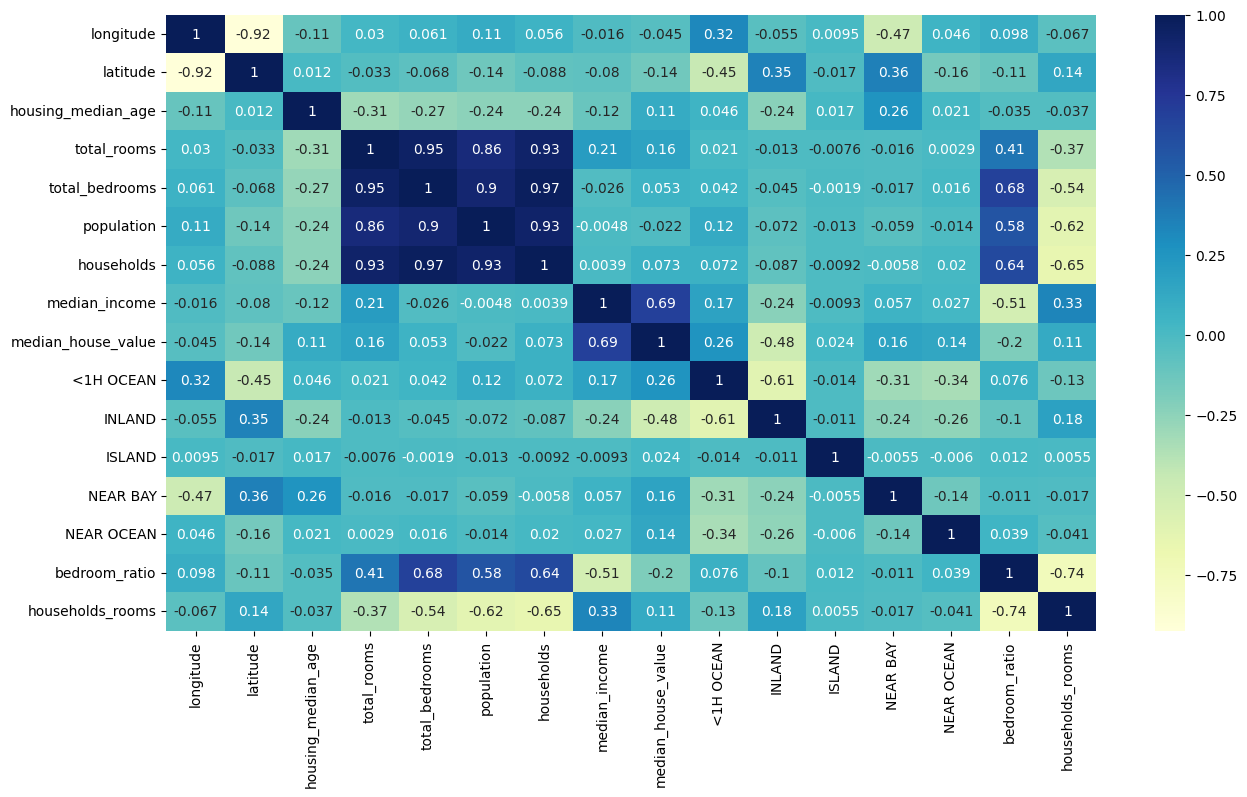

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu')

## What does the Plot shows us?
### We can see that the new added Attribute Bedroom Ratio has a negative impact to the House Value. And the households are not as much important than the Household Rooms correlated to the House Value. Also, Total Bedrooms are not as much important than the Total number of Rooms

# Split Up Data into Test and Train

In [15]:
X = dataset.drop(['median_house_value'], axis=1)
y = dataset['median_house_value']
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,households_rooms
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,False,False,False,True,False,0.717813,1.399834
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,False,False,False,True,False,0.790429,1.260013
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,False,False,False,True,False,0.720313,1.407171
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,False,False,False,True,False,0.764097,1.325768
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,False,False,False,True,False,0.762444,1.329892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,False,True,False,False,False,0.798973,1.278530
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,False,True,False,False,False,0.766205,1.380045
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,False,True,False,False,False,0.801228,1.271340
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,False,True,False,False,False,0.799078,1.285243


In [16]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,households_rooms,median_house_value
15610,-116.87,32.72,13.0,8.092239,6.198479,7.266827,6.222576,5.7652,True,False,False,False,False,0.765978,1.300464,259900.0
12478,-121.48,38.59,52.0,7.079184,5.834811,6.946014,5.771441,1.6116,False,True,False,False,False,0.824221,1.226589,70500.0
5996,-117.73,34.09,36.0,7.342132,5.697093,7.212294,5.717028,3.5313,False,True,False,False,False,0.775945,1.284257,117800.0
11827,-121.02,39.01,17.0,8.473659,6.684612,7.633854,6.647688,3.9734,False,True,False,False,False,0.788870,1.274678,185400.0
5183,-118.26,33.94,41.0,7.320527,6.018593,7.250636,5.966147,1.6500,True,False,False,False,False,0.822153,1.227011,94200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13246,-117.63,34.12,4.0,8.371936,6.654153,7.299797,6.498282,6.0758,False,True,False,False,False,0.794816,1.288331,226800.0
19844,-119.09,36.42,17.0,6.777647,5.393628,6.874198,5.389072,2.0000,False,True,False,False,False,0.795797,1.257665,52500.0
9944,-122.26,38.16,23.0,7.951911,6.198479,7.369601,6.146329,4.0337,False,False,False,True,False,0.779495,1.293766,130400.0
10908,-117.86,33.74,9.0,6.265301,5.147494,7.137278,5.111988,3.3750,True,False,False,False,False,0.821588,1.225610,165300.0


In [18]:
test_data = X_test
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,households_rooms
14185,-117.08,32.70,37.0,7.685703,6.037871,7.171657,5.929589,2.8750,False,False,False,False,True,0.785598,1.296161
6125,-117.91,34.11,20.0,8.058011,6.529419,7.781973,6.570883,3.5250,True,False,False,False,False,0.810302,1.226321
14095,-117.10,32.75,11.0,7.780721,6.588926,7.552762,6.568078,1.3448,False,False,False,False,True,0.846827,1.184627
14359,-117.22,32.74,52.0,7.139660,5.313206,6.320768,5.347108,7.2758,False,False,False,False,True,0.744182,1.335238
18004,-121.99,37.29,32.0,7.983099,6.177944,7.198184,6.177944,6.4631,True,False,False,False,False,0.773878,1.292193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19533,-120.91,37.66,36.0,7.186144,5.545177,6.580639,5.451038,2.6523,False,True,False,False,False,0.771648,1.318307
7695,-118.11,33.96,29.0,7.932003,6.368187,7.153834,6.311735,4.3882,True,False,False,False,False,0.802847,1.256707
15558,-117.07,33.12,12.0,7.805475,6.396930,7.132498,6.272877,2.4122,True,False,False,False,False,0.819544,1.244321
16731,-120.49,35.35,17.0,8.020928,6.411818,7.284821,6.302619,3.1641,True,False,False,False,False,0.799386,1.272634


# Train Our Model using
## 1. linear regression with scaling

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

LinearRegression()

In [20]:
X_test_scaled = scaler.transform(X_test)

In [21]:
reg.score(X_test_scaled, y_test)

0.6779323344640635

### We see our Model score is at 67%. We have to optimize the Model to get at least over 80%

## 2. Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.8132680979686882

### We see our Model scores with over 80% but we can optimize it even further with grid search and cross validation

In [23]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor(n_estimators=100, random_state=0) 

param_grid = {
    'n_estimators': [30, 50, 100],
    'max_features': [8, 12, 20],
    "min_samples_split": [2, 4, 6, 8],
}

grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_features': [8, 12, 20],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [24]:
best_forest = grid_search.best_estimator_

In [25]:
best_forest.score(X_test_scaled, y_test)

0.816336972039517

### We optimized it even further to get a score from 81.3% to 81.6%

# Drift Detection after Feature Engineering

### Kolmogorov-Smirnov Windowing

In [34]:
from scipy.stats import ks_2samp

# Apply Kolmogorov-Smirnov test for continuous features
ks_results = {}
for column in X.select_dtypes(include=['float64']).columns:
    ks_stat, p_value = ks_2samp(X_train[column], X_test[column])
    ks_results[column] = (ks_stat, p_value)

ks_results


{'longitude': (0.015058459779617117, 0.44430133284304996),
 'latitude': (0.01248686834026036, 0.6828846668492182),
 'housing_median_age': (0.01629629580842784, 0.34651932174324673),
 'total_rooms': (0.012287350637521066, 0.7020135983199264),
 'total_bedrooms': (0.010136349520886573, 0.886550780092306),
 'population': (0.009155361287206981, 0.9444993921322787),
 'households': (0.008605665991408967, 0.9670656355198661),
 'median_income': (0.013241619755033796, 0.6101916083136117),
 'bedroom_ratio': (0.016492295868422296, 0.3324223512952502),
 'households_rooms': (0.014401079709754683, 0.5018355499673137)}

### Analysis
No drift detected!

Each <code>**p_value**</code> is greather than 0.05

### Visualization

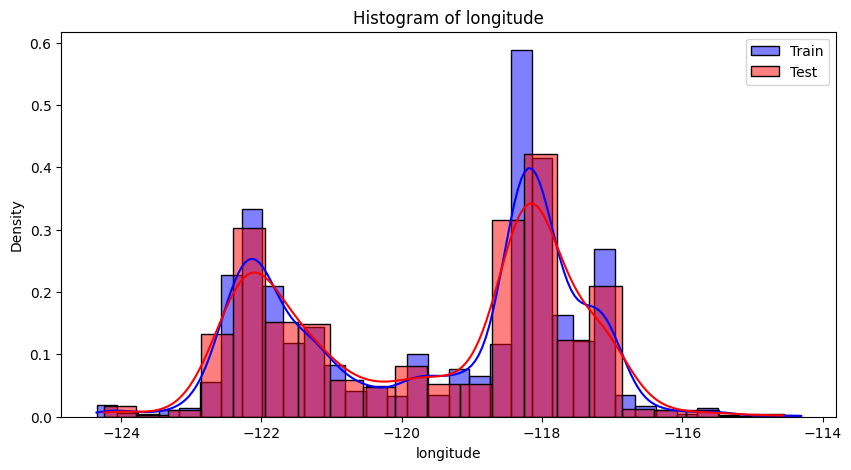

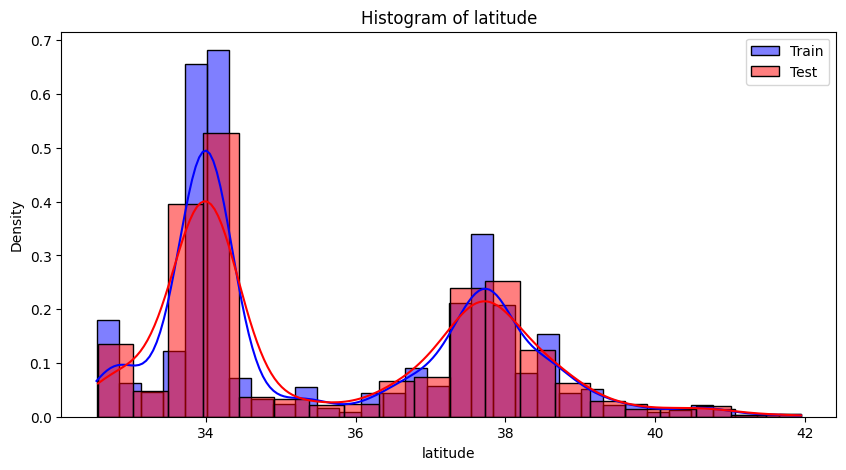

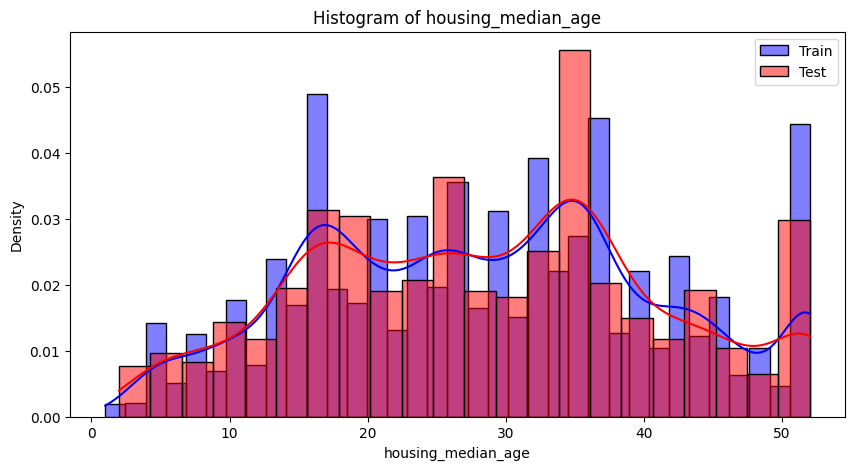

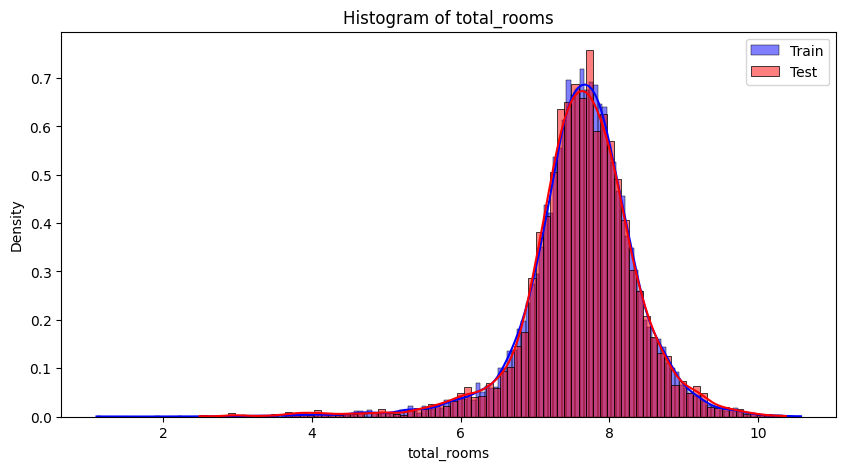

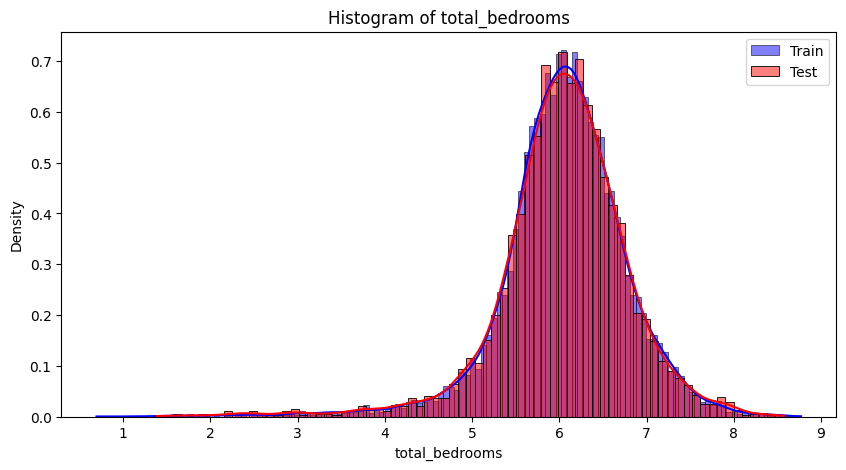

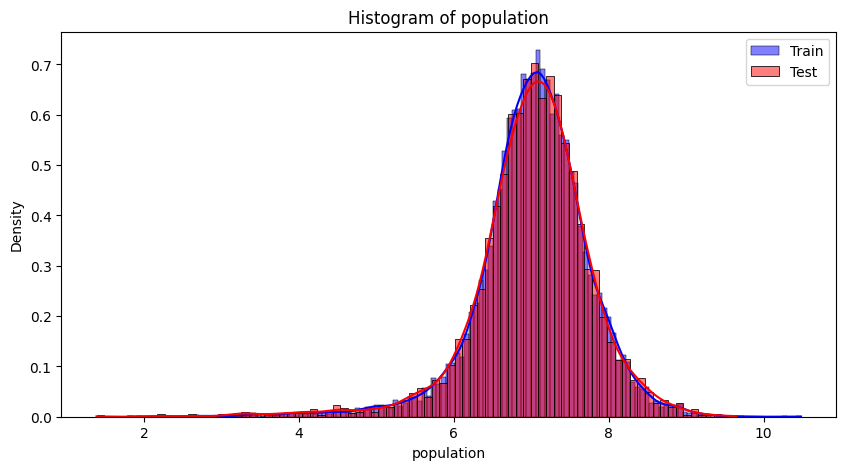

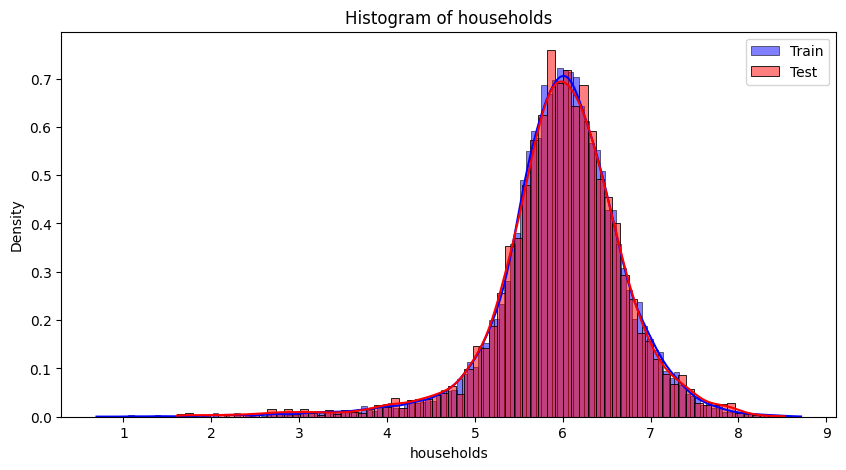

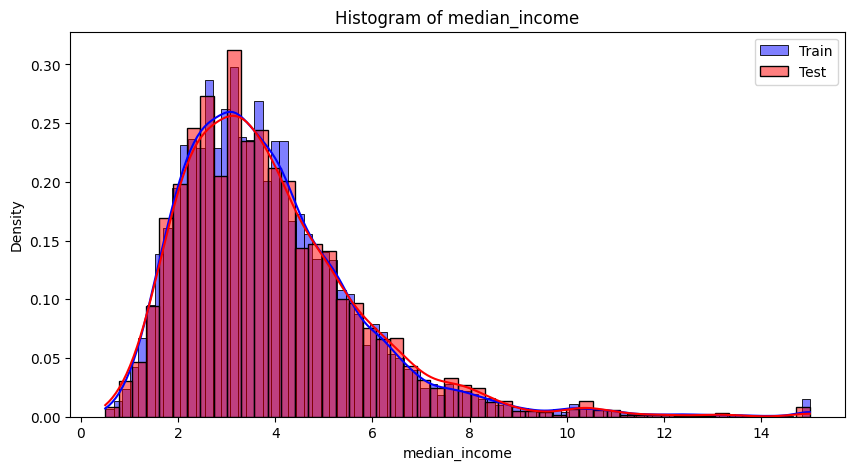

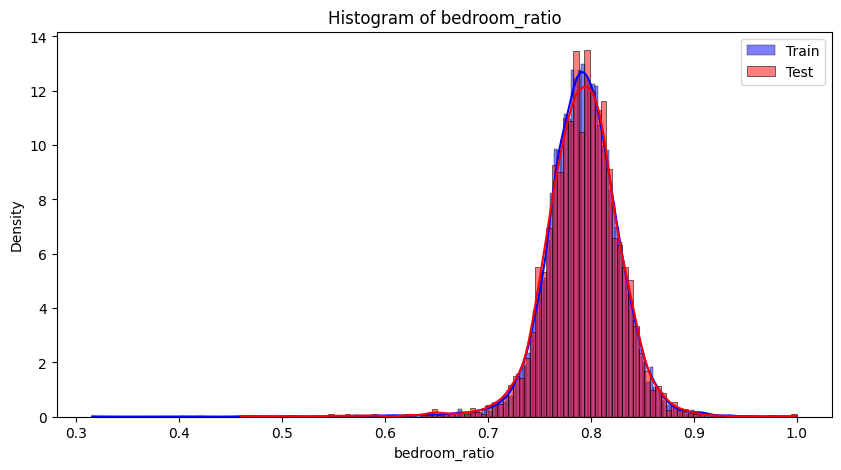

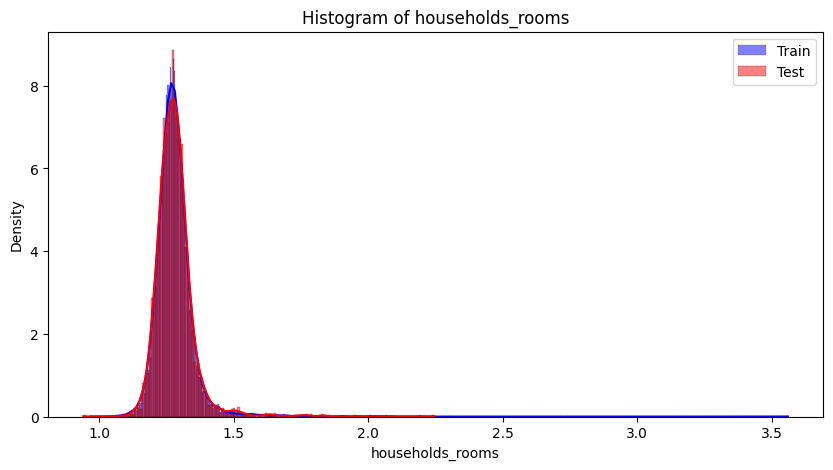

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for continuous features
for column in X.select_dtypes(include=['float64']).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(train_data[column], color='blue', label='Train', kde=True, stat="density")
    sns.histplot(test_data[column], color='red', label='Test', kde=True, stat="density")
    plt.title(f'Histogram of {column}')
    plt.legend()
    plt.show()

# Plot count plots for categorical features
for column in X.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=train_data, x=column, color='blue', label='Train', alpha=0.6)
    sns.countplot(data=test_data, x=column, color='red', label='Test', alpha=0.6)
    plt.title(f'Count Plot of {column}')
    plt.legend()
    plt.show()


### Analysis
By comparing the plots for the train and test subsets, we cannot visually detect significant differences in distributions.